In [1]:
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm

In [2]:
df,df_left_out = leave_one_out()

In [23]:
normalize = True
expert_rule = True

In [4]:
X_train = df.drop('label',axis=1)
y_train = df['label']
X_test = df_left_out.drop('label',axis=1)
y_test = df_left_out['label']

In [5]:
if normalize:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [55]:
clf = RandomForestClassifier(random_state=0,class_weight='balanced')
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

precision:  0.8121685592745763
recall:  0.7109061350903961
f1:  0.7309969348489297


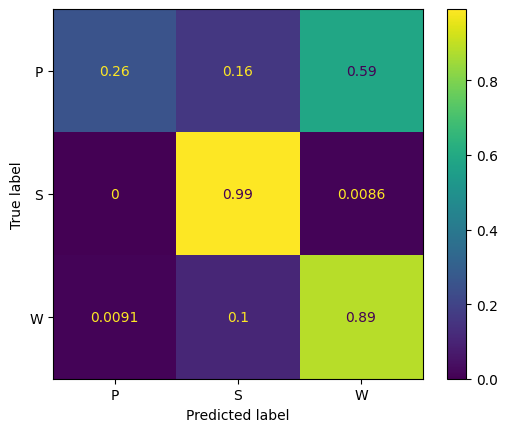

In [66]:
y_pred = clf.predict(X_test)
if expert_rule:
    for i in range(len(y_pred)-2):
        if y_pred[i] == y_pred[i+2]:
            y_pred[i+1] = y_pred[i]
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,normalize='true'),display_labels=['P','S','W'])
cm.plot()
precision = precision_score(y_pred=y_pred,y_true=y_test,average='macro')
recall = recall_score(y_pred=y_pred,y_true=y_test,average='macro')
f1 = f1_score(y_pred=y_pred,y_true=y_test,average='macro')
print('precision: ',precision)
print('recall: ',recall)
print('f1: ',f1)


In [71]:
import plotly.express as px
fig = px.line(pd.DataFrame([y_test,y_pred],index=['true','pred']).T)
fig.show(renderer='browser')